In [3]:
# Example 3.25 Ensemble2.py
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor



C:\Work files\course content\test_proj\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Work files\course content\test_proj\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=1)),
                            ('rf', RandomForestRegressor(random_state=1)),
                            ('lr', LinearRegression()),
                            ('NN', MLPRegressor())])


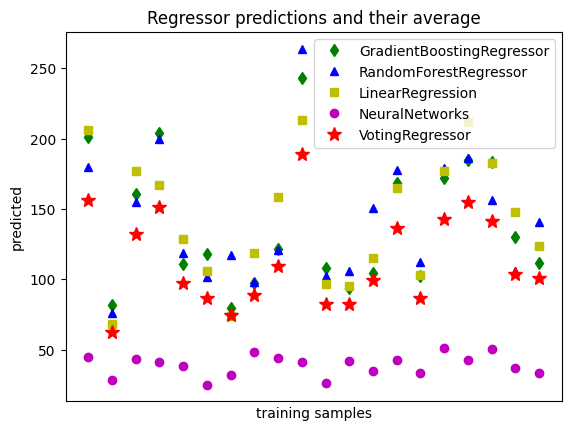

In [6]:
X, y = load_diabetes(return_X_y=True)

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
reg4 = MLPRegressor()


reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)
reg4.fit(X, y)
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3), ('NN', reg4)])

print(ereg.fit(X, y))

# Now we will use each of the regressors to make the 20 first
#predictions.

xt = X[:20]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = reg4.predict(xt)
pred5 = ereg.predict(xt)

plt.figure()

plt.plot(pred1, 'gd', label='GradientBoostingRegressor')
plt.plot(pred2, 'b^', label='RandomForestRegressor')
plt.plot(pred3, 'ys', label='LinearRegression')
plt.plot(pred4, 'mo', label='NeuralNetworks')
plt.plot(pred5, 'r*', ms=10, label='VotingRegressor')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')
plt.show()